In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
wine = load_wine()
x = wine.data 
y = wine.target

x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

max_depth = 15
n_estimator = 10

with mlflow.start_run():
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimator,random_state=42)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred )
    mlflow.log_metric('accuracy ',accuracy )
    mlflow.log_param('max_depth ',max_depth)
    mlflow.log_param('n_estimator ',n_estimator)



In [4]:
print(accuracy)

0.9444444444444444


Text(0.5, 1.0, 'Confusion matrix')

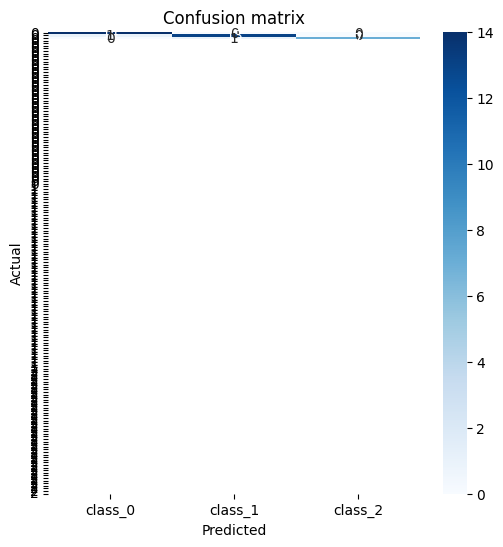

In [5]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=wine.target_names,yticklabels=wine.target)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')


In [6]:
print(mlflow.get_artifact_uri())

mlflow-artifacts:/0/af303d19e5fd402f8c5e838910c1b4ce/artifacts
